<a href="https://colab.research.google.com/github/YasminGarcia1210/MAESTRIA_DATOS/blob/main/TAREA_FUNDAMENTOS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentos De Analítica_2**

Yasmin Johanna García

Ricardo Muñoz



## **1. Carga de paquetes**

In [1]:
import numpy as np
import pandas as pd # Operaciones con dataframes
from matplotlib import pyplot as plt # gráficos
from statsmodels.tsa.seasonal import seasonal_decompose # descomposición de series
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # Holwinters simple
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holwinters doble y tripe
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error


## **Ejercicio en Clase**

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses. Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.



## **2. Carga de datos**

Nuestra primera tarea será leer el archivo de Excel. Para eso podemos emplear el paquete Pandas. Carguemos los datos en un objeto que denominaremos data.

In [84]:
data = pd.read_excel("/content/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()
data.shape

(220, 4)

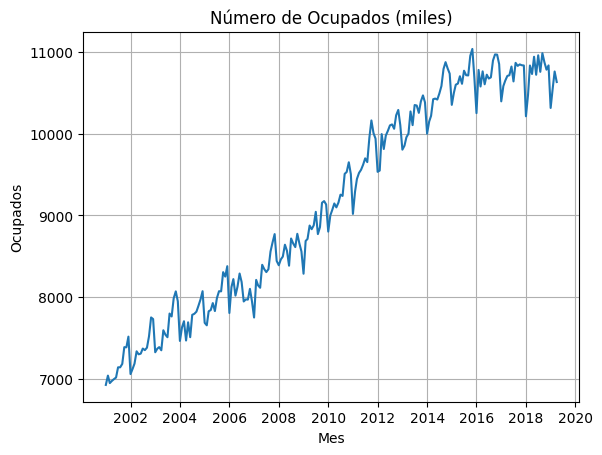

In [3]:
# Graficando los datos
plt.title("Número de Ocupados (miles)")
plt.xlabel("Mes")
plt.ylabel("Ocupados")
plt.plot(data[["Ocupados"]])
plt.grid()
plt.show()

## **3. Encontrando los componentes de una serie de tiempo**

En algunas ocasiones puede ser útil empezar nuestro análisis descomponiendo la serie de tiempo en sus componentes: **tendencia**, **estacionalidad** y **componente puramente aleatorio**. Una forma de hacer esto es empleando la función seasonal_decompose.

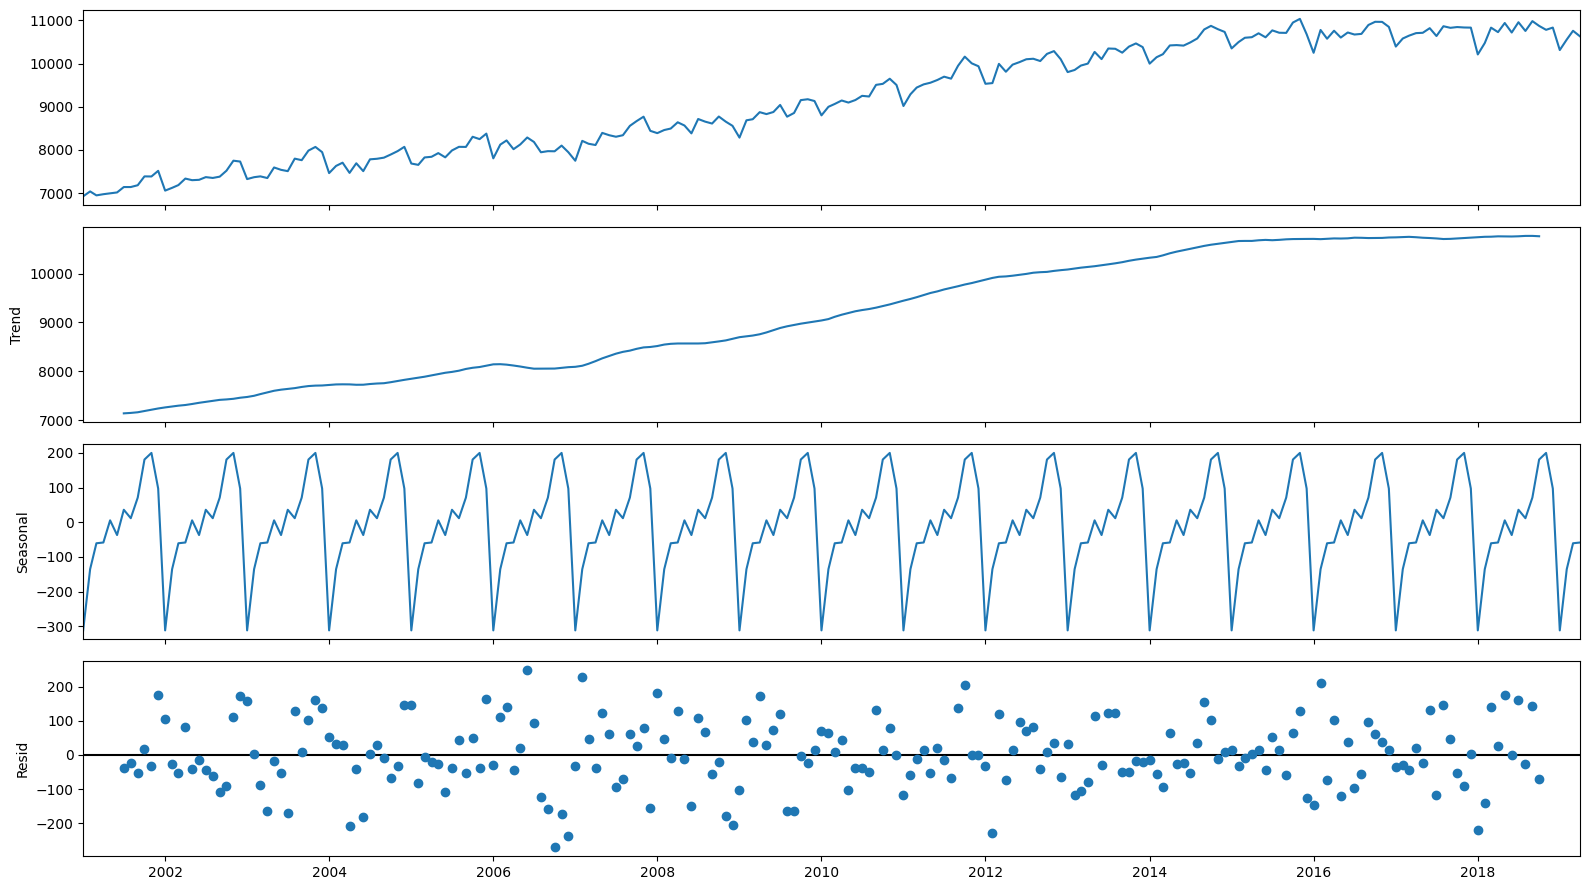

In [4]:
td_componentes = seasonal_decompose(data[["Ocupados"]],model="additive")
fig = td_componentes.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

### 3.1 Asi se extrae cada elemento de la descomposición de la serie.

In [5]:
td_componentes.seasonal
#td_componentes.trend
#td_componentes.resid

mes
2001-01-01   -311.454885
2001-02-01   -135.216366
2001-03-01    -60.470657
2001-04-01    -58.270721
2001-05-01      5.551095
                 ...    
2018-12-01     97.140345
2019-01-01   -311.454885
2019-02-01   -135.216366
2019-03-01    -60.470657
2019-04-01    -58.270721
Name: seasonal, Length: 220, dtype: float64

Antes de entrar a trabajar con los métodos de suavizamiento, vale la pena anotar que una forma sencilla y rápida para quitar el componente estacional (desestacionalizar) es restarle a la serie el componente estacional encontrado en la descomposición. Es decir,

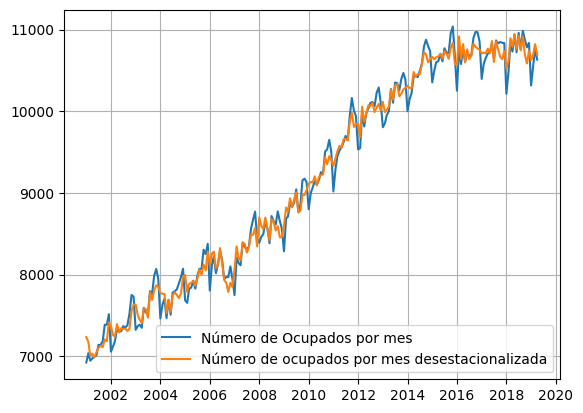

In [6]:
td_desestacionalizada = data["Ocupados"]-td_componentes.seasonal

plt.plot(data[["Ocupados"]],label="Número de Ocupados por mes")
plt.plot(td_desestacionalizada,label="Número de ocupados por mes desestacionalizada")
plt.legend()
plt.grid()
plt.show()


## **4. Pronosticando metodos de suavización**

Antes de continuar es importante guardar una parte de la muestra para evaluar el comportamiento de los modelos por fuera de muestra (out-of-sample). Guardemos un año de datos.

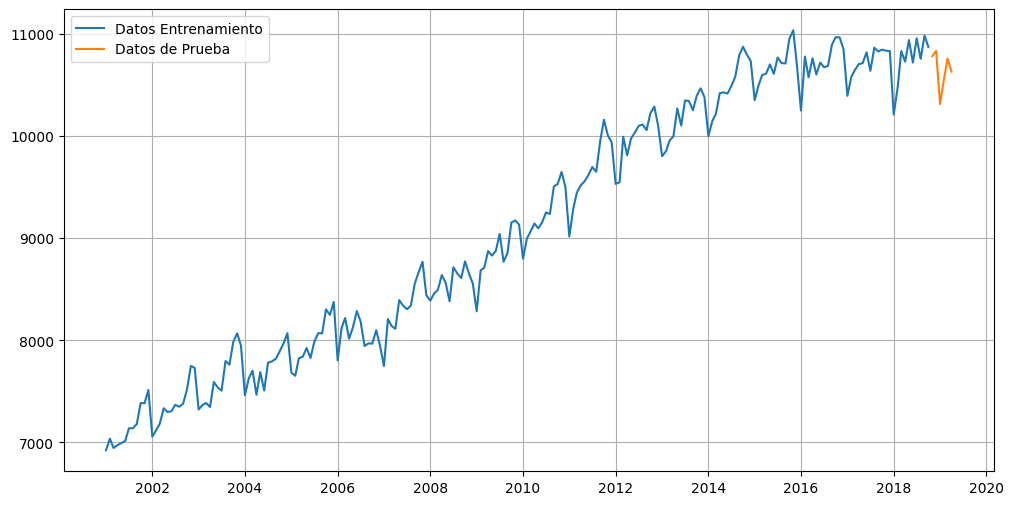

In [40]:
train_len = 214
train_td = data[["Ocupados"]][:train_len]
test_td = data[["Ocupados"]][train_len:]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_td,label="Datos Entrenamiento")
plt.plot(test_td,label="Datos de Prueba")
plt.grid()
plt.legend()
plt.show()

In [41]:
train_td

,Ocupados
mes,
2001-01-01,6923.604
2001-02-01,7037.746
2001-03-01,6945.973
2001-04-01,6973.079
2001-05-01,6994.462
...,...
2018-06-01,10720.946
2018-07-01,10959.197
2018-08-01,10756.782


In [42]:
test_td

,Ocupados
mes,
2018-11-01,10783.299
2018-12-01,10835.398
2019-01-01,10314.438
2019-02-01,10557.917
2019-03-01,10760.776
2019-04-01,10632.028


### **4.1 Promedio movil**

El promedio móvil está dado por:

$$ F_{t + 1}=\frac{Y_{t} + Y_{t-1} + Y_{t-(k-1)} }{ k} $$

El método de los promedios móviles utiliza el promedio de los $k$
valores de datos más recientes en la serie de tiempo como el
pronóstico para el siguiente periodo.

El término móvil indica que, mientras se dispone de una nueva
observación para la serie de tiempo, reemplaza a la observación más
antigua de la ecuación anterior y se calcula un promedio nuevo.
Como resultado, el promedio cambiará, o se moverá, conforme surjan
nuevas observaciones.

$Y_{t}$ = Observación en el período t

$F_{t}$ = Pronóstico en el período t


Este código calcula la media móvil (también conocida como media móvil simple) de una serie temporal utilizando diferentes ventanas de tiempo. Aquí hay una explicación más detallada:
ma_2 calcula la media móvil utilizando una ventana de 2 puntos de datos.
ma_3 calcula la media móvil utilizando una ventana de 3 puntos de datos.
ma_4 calcula la media móvil utilizando una ventana de 4 puntos de datos.
ma_5 calcula la media móvil utilizando una ventana de 5 puntos de datos.

In [43]:
## Considerando el dato actual
ma_2= train_td.rolling(2,min_periods=2).mean()
ma_3= train_td.rolling(3,min_periods=2).mean()
ma_4= train_td.rolling(4,min_periods=2).mean()
ma_5= train_td.rolling(5,min_periods=2).mean()

In [44]:
## Sin considerar el dato actual
ma_2= train_td.shift().rolling(2,min_periods=2).mean()
ma_3= train_td.shift().rolling(3,min_periods=2).mean()
ma_4= train_td.shift().rolling(4,min_periods=2).mean()
ma_5= train_td.shift().rolling(5,min_periods=2).mean()


In [45]:
#Este código define una función llamada fore_ma que calcula las predicciones utilizando el método de media móvil (MA) para una serie temporal
def fore_ma(datos,w,h):
  data=datos.copy()
  for x in range(1,h+1):
    ind = data.index[-1]
    value = ind + pd.DateOffset(months=1)
    data.loc[value]= data[-w:].mean()
  return data[-h:]

In [47]:
ma_2_f= fore_ma(train_td,2,6)
ma_3_f= fore_ma(train_td,3,6)
ma_4_f= fore_ma(train_td,4,6)
ma_5_f= fore_ma(train_td,5,6)
# Los Rmse
rmse_ma_2 = np.sqrt(mean_squared_error(test_td,ma_2_f ))
rmse_ma_3 = np.sqrt(mean_squared_error(test_td,ma_3_f ))
rmse_ma_4 = np.sqrt(mean_squared_error(test_td,ma_4_f ))
rmse_ma_5 = np.sqrt(mean_squared_error(test_td,ma_5_f ))

In [14]:
print( rmse_ma_2, rmse_ma_3 ,rmse_ma_4 ,rmse_ma_5)

180.61405651284463 190.8075001193029 218.76010738130725 221.86244433696749


## El mejor **rmse** es

```
rmse_ma_2: 180.61405651284463
```



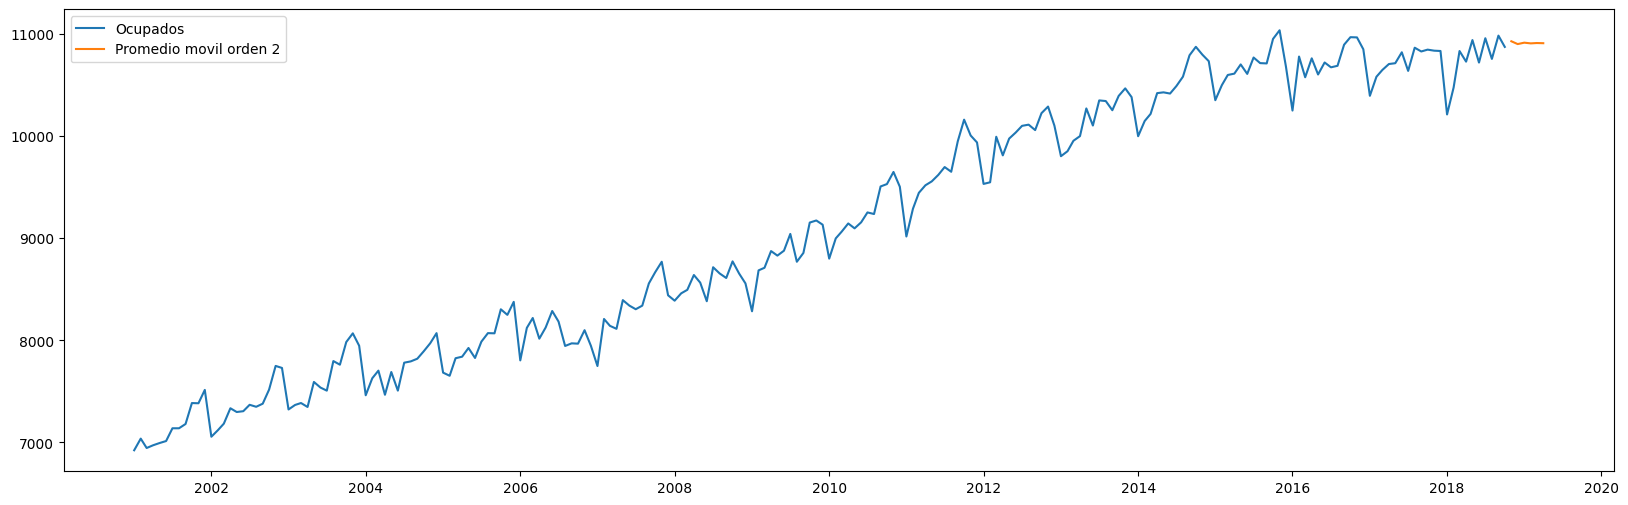

In [48]:
#Grafico la rmse_ma_n para el dato menor
fig = plt.figure(figsize=(20, 6))
plt.plot(train_td,label="Ocupados")
plt.plot(ma_2_f,label="Promedio movil orden 2")
plt.legend()
plt.show()

### **4.2 Suavizacion Exponencial Simple**

In [50]:
# Build model.
ets_model = ETSModel(endog=train_td["Ocupados"],error="add")#,trend="add",seasonal="mul" )
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(6)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds = pd.concat([limits, conf_forecast], axis = 1)
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            Point_forecast      lower_95      upper_95
2018-11-01    10890.815856  10535.182689  11246.449022
2018-12-01    10890.815856  10469.673459  11311.958252
2019-01-01    10890.815856  10413.063946  11368.567765
2019-02-01    10890.815856  10362.485602  11419.146109
2019-03-01    10890.815856  10316.343206  11465.288506
2019-04-01    10890.815856  10273.641006  11507.990705


## Suavización exponencial

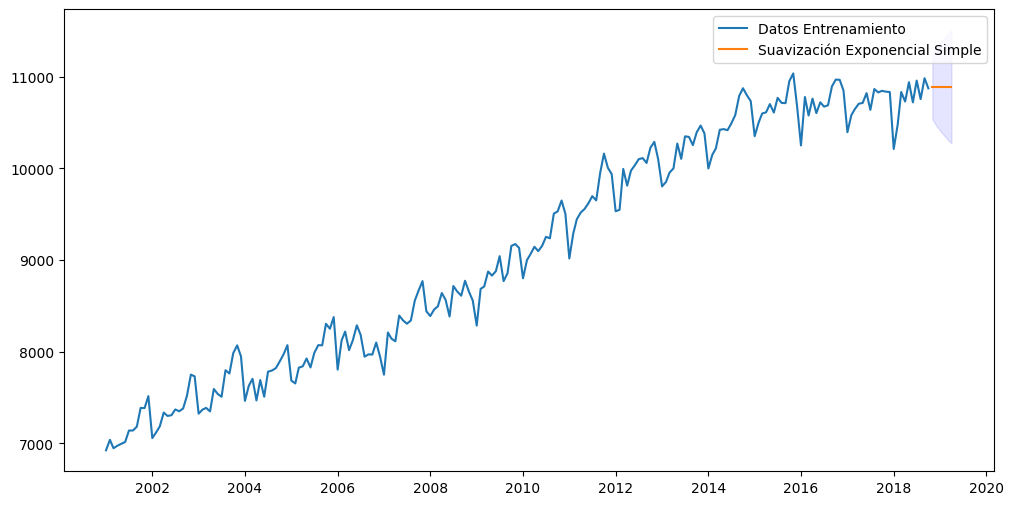

In [51]:
fig = plt.figure(figsize=(12, 6))
plt.plot(train_td,label="Datos Entrenamiento")
plt.plot(preds['Point_forecast'],label="Suavización Exponencial Simple")
plt.fill_between(preds.index ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [52]:
ets_result.alpha

0.6343030045478203

In [53]:
rmse = np.sqrt(mean_squared_error(test_td,point_forecast ))
print(rmse)

300.4290298412983


#**4.3 Suavizacion Exponencial Lineal (Holt)**

In [54]:
# Build model.
ets_model = ETSModel(endog=train_td["Ocupados"],error="mul",trend="mul")#,seasonal="mul" )
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(6)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds_holt = pd.concat([limits, conf_forecast], axis = 1)
preds_holt.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds_holt)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            Point_forecast      lower_95      upper_95
2018-11-01    10932.699204  10483.816021  11348.775933
2018-12-01    10956.943685  10465.807161  11457.860669
2019-01-01    10981.241931  10411.591049  11518.183656
2019-02-01    11005.594061  10397.741399  11586.237589
2019-03-01    11030.000195  10397.163349  11624.835486
2019-04-01    11054.460452  10334.860123  11720.178632


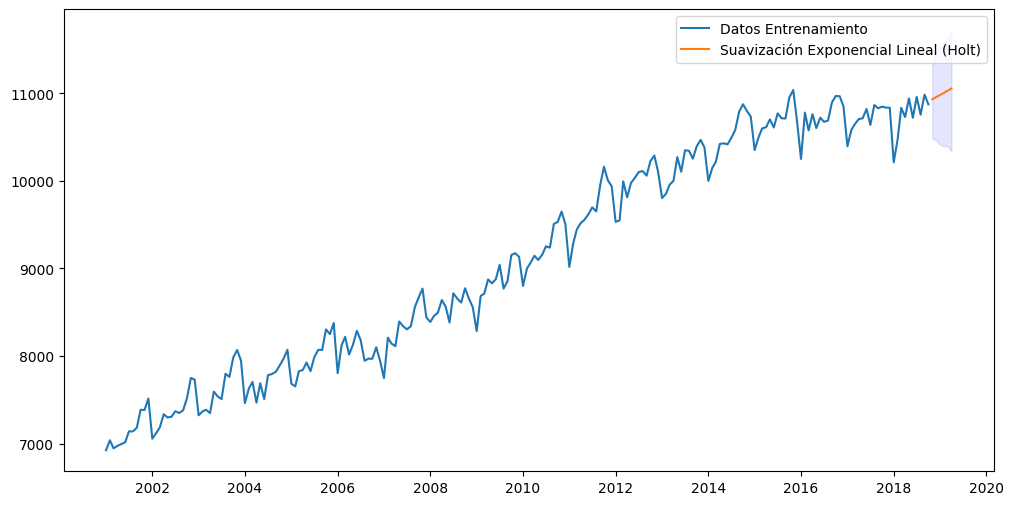

In [55]:
fig = plt.figure(figsize=(12, 6))
plt.plot(train_td,label="Datos Entrenamiento")
plt.plot(preds_holt['Point_forecast'],label="Suavización Exponencial Lineal (Holt)")
plt.fill_between(preds_holt.index ,preds_holt['lower_95'], preds_holt['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [56]:
print(ets_result.alpha,ets_result.beta)

0.5483136299154637 5.483136299154638e-05


In [57]:
rmse_holt = np.sqrt(mean_squared_error(test_td,preds_holt['Point_forecast']))
print(rmse_holt)

394.349010523351


## **4.3 Suavizacion Exponencial Lineal de Winters (Holt-Winters)**

In [60]:
# Build model
ets_model = ETSModel(endog=train_td["Ocupados"],error="add",trend="add",seasonal="add" )
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(6)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds_hw_add = pd.concat([limits, conf_forecast], axis = 1)
preds_hw_add.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds_hw_add)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            Point_forecast      lower_95      upper_95
2018-11-01    11016.615370  10758.765337  11274.465403
2018-12-01    10910.345328  10638.016873  11182.673784
2019-01-01    10431.804223  10145.726486  10717.881959
2019-02-01    10707.064097  10407.865684  11006.262509
2019-03-01    10853.107263  10541.337405  11164.877121
2019-04-01    10868.686776  10544.830737  11192.542816


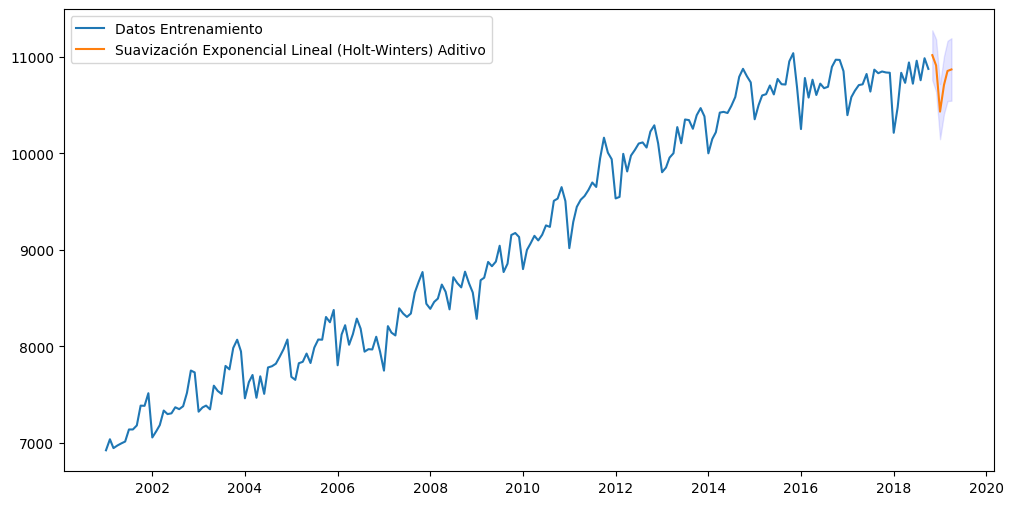

In [61]:
fig = plt.figure(figsize=(12, 6))
plt.plot(train_td,label="Datos Entrenamiento")
plt.plot(preds_hw_add['Point_forecast'],label="Suavización Exponencial Lineal (Holt-Winters) Aditivo")
plt.fill_between(preds_hw_add.index ,preds_hw_add['lower_95'], preds_hw_add['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [62]:
print(ets_result.alpha,ets_result.beta,ets_result.gamma)

0.3397512482944894 3.397512482944894e-05 0.3013646393190514


In [63]:
rmse_hw_add = np.sqrt(mean_squared_error(test_td,preds_hw_add['Point_forecast']))
print(rmse_hw_add)

163.6081475588887


In [100]:
# Build model.
ets_model = ETSModel(endog=train_td["Ocupados"],error="add",trend=None,seasonal="mul" , )
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(6)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds_hw_mul = pd.concat([limits, conf_forecast], axis = 1)
preds_hw_mul.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds_hw_mul)

            Point_forecast      lower_95      upper_95
2018-11-01    10974.856321  10740.482941  11192.979980
2018-12-01    10849.851832  10583.115017  11110.501002
2019-01-01    10377.100978  10087.608620  10652.276515
2019-02-01    10579.686260  10249.253811  10895.992588
2019-03-01    10663.322195  10291.543561  11039.789557
2019-04-01    10672.646077  10267.723770  11042.528560


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


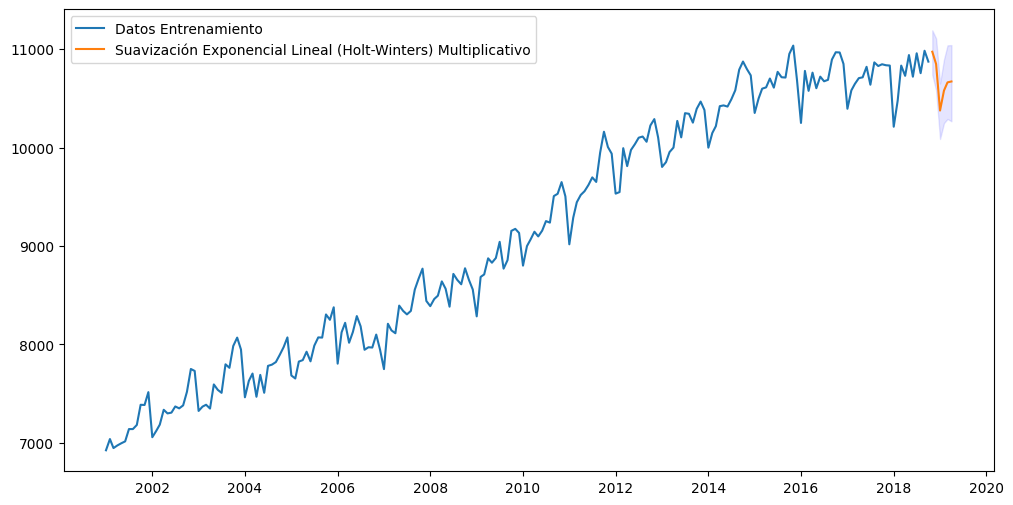

In [101]:
fig = plt.figure(figsize=(12, 6))
plt.plot(train_td,label="Datos Entrenamiento")
plt.plot(preds_hw_mul['Point_forecast'],label="Suavización Exponencial Lineal (Holt-Winters) Multiplicativo")
plt.fill_between(preds_hw_mul.index ,preds_hw_mul['lower_95'], preds_hw_mul['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [102]:
print(ets_result.alpha,ets_result.gamma)

0.5955123888201141 4.0448761117988584e-05


In [103]:
rmse_hw_mul = np.sqrt(mean_squared_error(test_td,preds_hw_mul['Point_forecast']))
print(rmse_hw_mul)

93.49754216989305


## Se tiene que el el mejor modelo es : Suavización exponencial lineal de Holt Winters multiplicativo con un rmse de 93.49 y un alpha de 0.59 y gamma de 4.04e-05

# Se ajusta el Modelo

In [69]:
ets_model = ETSModel(endog=train_td["Ocupados"],error="add",trend=None,seasonal="mul")
ets_result = ets_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
## Se obtienen los hiperparametros
print(ets_result.alpha)
#print(ets_result.beta)
print(ets_result.gamma)
print(ets_result.param_names)

0.5955123888201141
4.0448761117988584e-05
['smoothing_level', 'smoothing_seasonal', 'initial_level', 'initial_seasonal.0', 'initial_seasonal.1', 'initial_seasonal.2', 'initial_seasonal.3', 'initial_seasonal.4', 'initial_seasonal.5', 'initial_seasonal.6', 'initial_seasonal.7', 'initial_seasonal.8', 'initial_seasonal.9', 'initial_seasonal.10', 'initial_seasonal.11']


In [71]:
## Ahora se ajusta el modelo final con todos los datos

final_model = ETSModel(endog=data["Ocupados"],error="add",trend="add",seasonal="mul")
final_model_fit = final_model.fit_constrained({'smoothing_level': 0.5955123888201141,'smoothing_seasonal':4.0448761117988584e-05})

print(final_model_fit.alpha)
print(final_model_fit.beta)
print(final_model_fit.gamma)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


0.5955123888201141
0.001617701366378306
4.0448761117988584e-05


# Predicción de los proximos 6 meses Usando todos los datos

In [74]:
# Predicción para los próximos 6 meses
forecast_results = final_model_fit.forecast(steps=6)

# Imprimir las predicciones
print(forecast_results)


2019-05-01    10766.326371
2019-06-01    10740.813142
2019-07-01    10847.206067
2019-08-01    10836.435924
2019-09-01    10930.064256
2019-10-01    11072.531773
Freq: MS, Name: simulation, dtype: float64


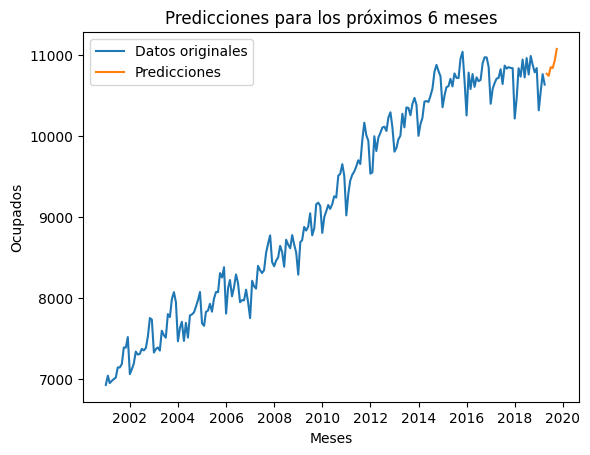

In [80]:
# Obtener las predicciones
forecast_results = final_model_fit.forecast(6)

# Graficar los datos originales
plt.plot(data["Ocupados"], label='Datos originales')

# Graficar las predicciones
plt.plot(forecast_results, label='Predicciones')

# Agregar etiquetas y leyenda
plt.xlabel('Meses')
plt.ylabel('Ocupados')
plt.title('Predicciones para los próximos 6 meses')
plt.legend()

# Mostrar la gráfica
plt.show()
